# 911 Calls Database

In [34]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')
import seaborn as sns

# Get the Data

In [35]:
df = pd.read_csv('E:\\Acads\\AdvPython\\Capstone\\\911Calls\\\911Calls.csv')

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

# Questions 

What are the top 5 zipcodes for 911 calls?

In [36]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

What are the top 5 townships (twp) for 911 calls?

In [37]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

How many unique title codes are there?

In [38]:
df['title'].nunique()

110

# Feature Engineering

What is the most common Reason for a 911?

In [39]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Create a countplot of 911 calls by Reason

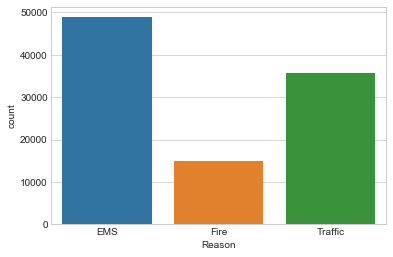

In [40]:
sns.countplot(df['Reason'])

Use pd.to_datetime to convert the column from strings to DateTime objects

In [41]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null datetime64[ns]
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
Reason       99492 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 7.6+ MB


Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week.

In [42]:
df['Hour']        = df['timeStamp'].apply(lambda x: x.hour)
df['Month']       = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

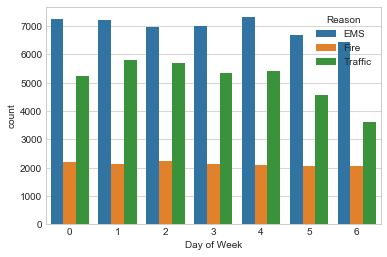

In [43]:
sns.countplot(df['Day of Week'],hue=df['Reason'])

Now use seaborn to create a countplot of the Month column with the hue based off of the Reason column.

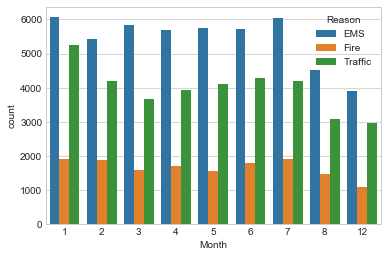

In [44]:
sns.countplot(df['Month'],hue=df['Reason'])

Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. 

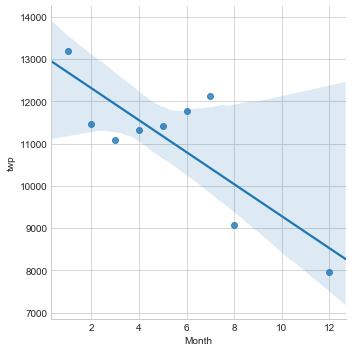

In [45]:
byMonth = df.groupby('Month').count()
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

# Data Analysis

Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

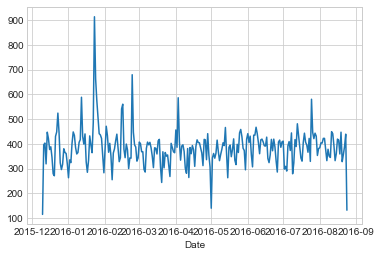

In [46]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
byDate = df.groupby('Date').count()
byDate['Reason'].plot()

Now let's move on to creating heatmaps with seaborn and our data.

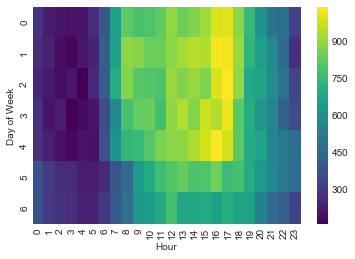

In [47]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
sns.heatmap(dayHour,cmap='viridis')

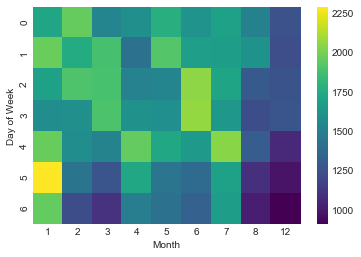

In [48]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
sns.heatmap(dayMonth,cmap='viridis')